**Examples**

Modeling Vaccination

In [1]:
from os.path import basename, exists
def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)
download('https://github.com/AllenDowney/ModSimPy/raw/master/' +
         'modsim.py')

Downloaded modsim.py


In [2]:
from modsim import *

In [3]:
download('https://github.com/AllenDowney/ModSimPy/raw/master/chap11.py')

Downloaded chap11.py


In [4]:
from chap11 import make_system
from chap11 import update_func
from chap11 import run_simulation

Immunization

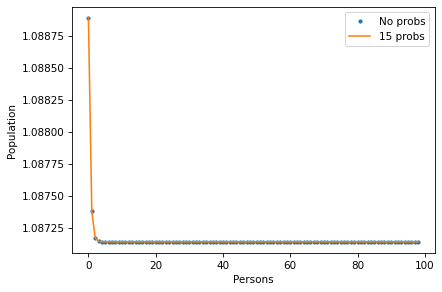

In [8]:
def add_immunization(system, fraction):
    system.init.s += fraction
    system.init.r -= fraction
ct = 8
rt = 1
b = 1 / ct
g = 1 / rt
system = make_system(b, g)
result = run_simulation(system, update_func)
system_2 = make_system(b, g)
add_immunization(system_2, 0.1)
results = run_simulation(system_2, update_func)
results.s.plot(style='.', label='No probs')
results.s.plot(label='15 probs')
decorate(xlabel='Persons',
         ylabel='Population')

Metrics

In [9]:
def calc_total_infected(results, system):
    s_0 = results.s[0]
    s_end = results.s[system.t_end]
    return s_0 - s_end
calc_total_infected(results, system)
calc_total_infected(results, system_2)

0.0017502350137890144

Sweeping Immunization

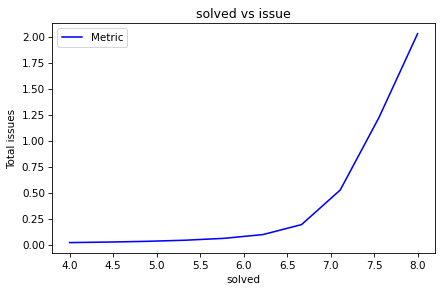

In [11]:
def sweep_immunity(fraction_array):
    sweep = SweepSeries()
    for fraction in fraction_array:
        system = make_system(b, g)
        add_immunization(system, fraction)
        results = run_simulation(system, update_func)
        sweep[fraction] = calc_total_infected(results, system)
    return sweep
fraction_array = linspace(4, 8, 10)
infected_sweep = sweep_immunity(fraction_array)
infected_sweep.plot(color='blue')
decorate(xlabel='solved',
         ylabel='Total issues',
         title='solved vs issue')

**Exercises**

Exercise 1

/content/chap11.py:15: RuntimeWarning: overflow encountered in double_scalars
  infected = system.beta * i * s
/content/chap11.py:15: RuntimeWarning: overflow encountered in double_scalars
  infected = system.beta * i * s
/content/chap11.py:15: RuntimeWarning: overflow encountered in double_scalars
  infected = system.beta * i * s
/content/chap11.py:15: RuntimeWarning: overflow encountered in double_scalars
  infected = system.beta * i * s
/content/chap11.py:15: RuntimeWarning: overflow encountered in double_scalars
  infected = system.beta * i * s
/content/chap11.py:15: RuntimeWarning: overflow encountered in double_scalars
  infected = system.beta * i * s
/content/chap11.py:15: RuntimeWarning: overflow encountered in double_scalars
  infected = system.beta * i * s


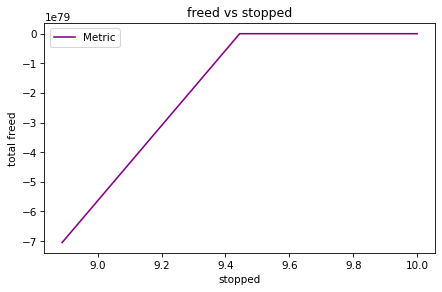

In [13]:
def add_quarantine(system, fraction):
    low = 4
    high = 8
    rt = high - fraction * (high-low)
    system.gamma = 2 / rt
def sweep_quarantine(fraction_array):
    sweep = SweepSeries()
    for fraction in fraction_array:
        system = make_system(b, g)
        add_quarantine(system, fraction)
        results = run_simulation(system, update_func)
        sweep[fraction] = calc_total_infected(results, system)
    return sweep
fraction_array = linspace(5, 10, 10)
infected_sweep = sweep_quarantine(fraction_array)
infected_sweep.plot(color='purple')
decorate(xlabel='stopped',
         ylabel='total freed',
         title='freed vs stopped')